# Logistic Regression Project - Predicting a binary choice

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

**Note: If a categorical variable column exist, dummy variables need to be created.  A dummy variable is a Nominal variable that can take on either 0 or 1. In your regression model, if you have k categories you would include only k-1 dummy variables in your regression/classifier because any one dummy variable is perfectly multicollinear/collinear with remaining set of dummies.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Get the Data
**Read in the advertising.csv file and set it to a data frame called df.**

In [2]:
df = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on df**

In [4]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


## Exploratory Data Analysis

**Histogram**

<AxesSubplot:xlabel='Age', ylabel='Count'>

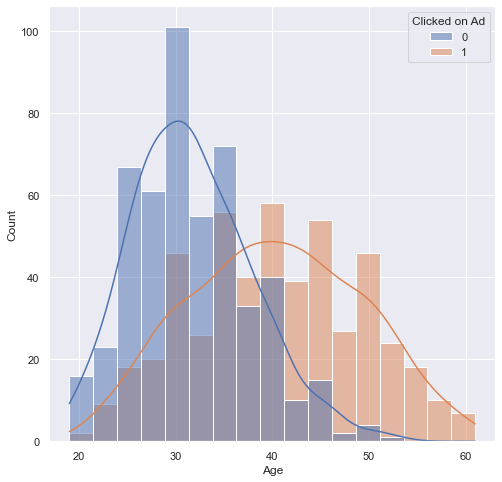

In [87]:
plt.figure(figsize=(8,8))
sns.histplot(x='Age', data=df, kde=True, hue='Clicked on Ad')

<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Count'>

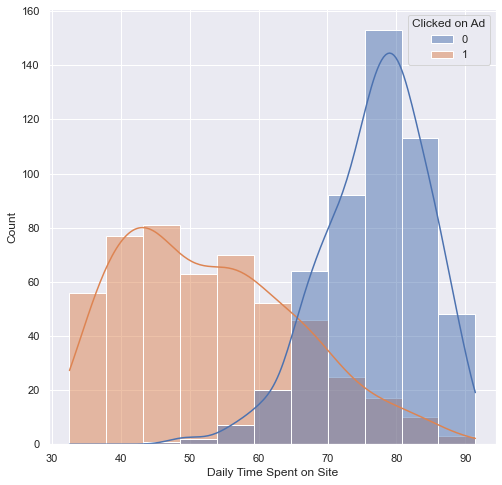

In [89]:
plt.figure(figsize=(8,8))
sns.histplot(x='Daily Time Spent on Site', data=df, kde=True, hue='Clicked on Ad')

**Jointplot showing Area Income versus Age.**

<Figure size 1440x576 with 0 Axes>

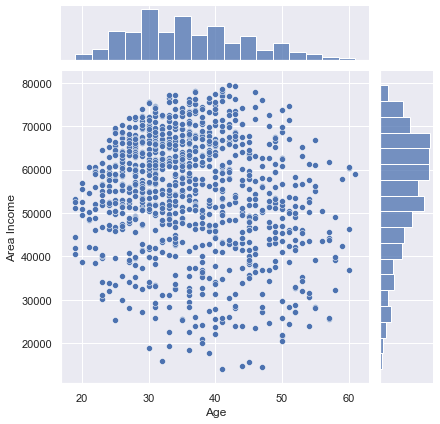

In [12]:

sns.jointplot(x='Age',y='Area Income', data=df)

**Jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

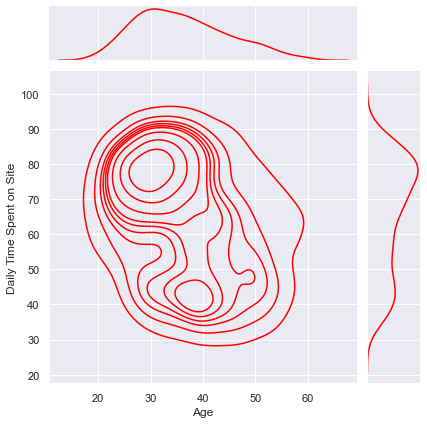

In [14]:
pltsize
sns.jointplot(x='Age',y='Daily Time Spent on Site', data=df, kind='kde', color='red')

**Jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

In [15]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

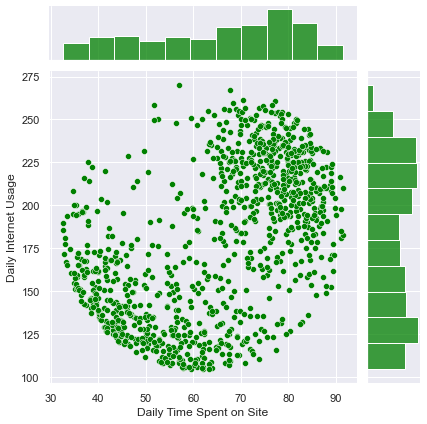

In [16]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=df, color='green')

**Pairplot with the hue defined by the 'Clicked on Ad' column feature.**

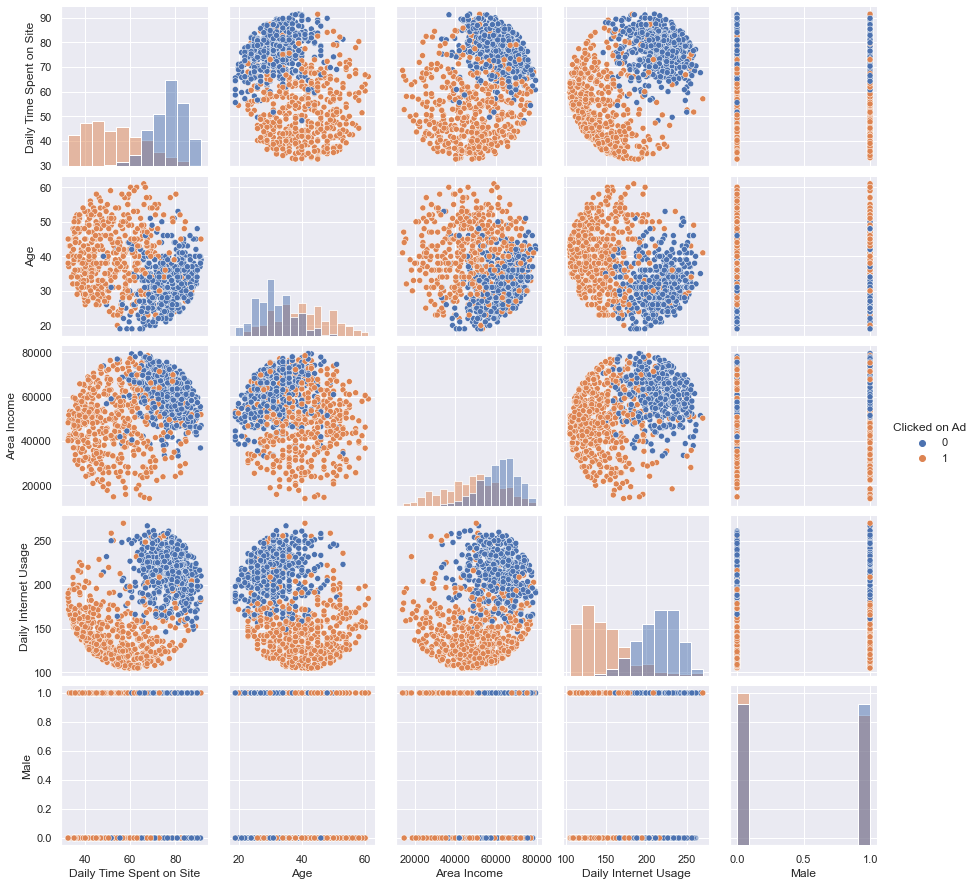

In [92]:
sns.pairplot(df, hue='Clicked on Ad', diag_kind='hist')

# Logistic Regression

**train test split, and train our model**

**Split the data into training set and testing set using train_test_split**

In [22]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [21]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [18]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop(['Clicked on Ad','Ad Topic Line','City','Country', 'Timestamp'],axis=1)
y = df['Clicked on Ad']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Train and fit a logistic regression model on the training set.**

In [80]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=500)

In [81]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=500)

# Predictions and Evaluations
**Predict values for the testing data.**

In [82]:
prediction = logmodel.predict(X_test)

**Classification report for the model.**

In [83]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

In [84]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [85]:
cm = confusion_matrix(y_test,prediction)
cm

array([[140,   6],
       [ 25, 129]], dtype=int64)

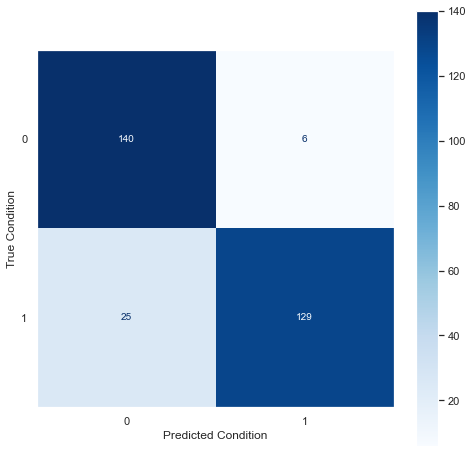

In [86]:
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
fig, ax = plt.subplots(figsize=(8,8))
cmd.plot(include_values=True, cmap='Blues', ax=ax)
cmd.ax_.set(xlabel='Predicted Condition', ylabel='True Condition', autoscale_on=True)
plt.grid(visible=None)

## Conclusion

**This logistic model has an accuracy of 90%.  
Of the predicted true positives, 0, the Positive Predicted Value (PPV) is 85%.  
Of the predicted false positives, 0 but in reality a 1, the False Discovery Rate (FDR) is 15%.  
Of the predicted false negatives, 1 but reality a 0, the False Omission Rate (FOR) is 4.4%.  
Of the predicted true negatives, 1, the Negative Predicted Value (NPV) is 96%.
Of the true condition true positive, 0, the True Positive Rate (TPR) aka Recall is 96%.
Of the true false positive, 0 but in reality a 1, the False Positive Rate (FPR) is 16%.**